# Интернет-магазин комьютерных игр "Стримчик"
# Выявить закономерности, определяющие успешность игры 
## Описание проекта:
* Изучим факторы, влияющие на продажи в игровой индустрии.  
* Составим топ-10 успешных платформ за всю историю.  
* Оценим жизненный цикл платформы.  
* Разберемся, какие показатели продаж считаются нормальными.  
* Рассмотрим влияние на коммерческий успех оценок пользователей и критиков.  
* Узнаем, какие жанры пользуются наибольшим спросом.  
* Составим портрет пользователя из разных регионов.  
* Проверим две гипотезы:  
> "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"      
> "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."
* Сделаем общий вывод.



# Шаг 1. Открываем файл

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("/datasets/games.csv")
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

# Шаг 2. Подготовка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df['sales_total'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [7]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     28.96      3.77         8.45          76.0          8      E   
1      3.58      6.81         0.77           NaN        NaN    NaN   
2     12.76      3.79         3.29          82.0        8.3      E   
3     10.93      3.28         2.95          80.0          8      E   
4      8.89     10.22         1.00           NaN        NaN    NaN   

   sales_total  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [8]:
df[df['user_score']=='tbd'].head()

name platform  year_of_release  \
119                             Zumba Fitness      Wii           2010.0   
301            Namco Museum: 50th Anniversary      PS2           2005.0   
520                           Zumba Fitness 2      Wii           2011.0   
645                              uDraw Studio      Wii           2010.0   
657  Frogger's Adventures: Temple of the Frog      GBA              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119     Sports      3.45      2.59       0.0         0.66           NaN   
301       Misc      2.08      1.35       0.0         0.54          61.0   
520     Sports      1.51      1.03       0.0         0.27           NaN   
645       Misc      1.65      0.57       0.0         0.20          71.0   
657  Adventure      2.15      0.18       0.0         0.07          73.0   

    user_score rating  sales_total  
119        tbd      E         6.70  
301        tbd   E10+         3.97  
520        tbd      T         2.81  
645        tbd      E         2.42  
657        tbd      E         2.40

In [9]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
1.5       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [10]:
df = df.replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')

Преполагаю, что tbd означает to be done, в любом случае без понимания как это интерпретировать заменяю на None


In [11]:
df[['year_of_release', 'critic_score', 'user_score', 'rating']].isna() .corr()

year_of_release  critic_score  user_score    rating
year_of_release         1.000000     -0.021924   -0.004633 -0.020232
critic_score           -0.021924      1.000000    0.798656  0.782945
user_score             -0.004633      0.798656    1.000000  0.731056
rating                 -0.020232      0.782945    0.731056  1.000000

Основная масса пропусков в `year_of_release` `critic_score` `user_score` `rating`.  
Причем видно, что игры часто либо оценивались по всем параметрам, либо не оценивались вовсе, отсюда и пропуски.   
Похоже, что пропуски в `year_of_release` не связаны с пропусками в оценках. Эти данные просто отсутствуют.  

In [12]:
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(df.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, df[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',df[col_l].isna().sum(),
        ', процент NaN', round(df[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sales_total      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во NaN 2 , про

In [13]:
df[df['rating'].isna()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1      29.08      3.58      6.81         0.77           NaN         NaN   
4      11.27      8.89     10.22         1.00           NaN         NaN   
5      23.20      2.26      4.22         0.58           NaN         NaN   
9      26.93      0.63      0.28         0.47           NaN         NaN   
10      9.05     10.95      1.93         2.74           NaN         NaN   

   rating  sales_total  
1     NaN        40.24  
4     NaN        31.38  
5     NaN        30.26  
9     NaN        28.31  
10    NaN        24.67

In [14]:
df[df['year_of_release'].isna()].head()

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
183      0.26      0.01         0.71          94.0         8.5      E   
377      2.36      0.04         0.51          84.0         6.4      E   
456      0.97      0.00         0.29          74.0         7.9   E10+   
475      1.02      0.00         0.41           NaN         NaN    NaN   
609      0.14      0.00         0.03           NaN         NaN    NaN   

     sales_total  
183         5.24  
377         3.50  
456         3.06  
475         3.00  
609         2.53

In [15]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
sales_total        0.000000
dtype: float64

In [16]:
df = df.dropna(subset=['year_of_release', 'name'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sales_total      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


# Шаг 3. Приступаем к анализу

## Посмотрим, сколько игр выпускалось в разные годы.  Важны ли данные за все периоды?

In [18]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

<AxesSubplot:title={'center':'Продажи'}, xlabel='year_of_release', ylabel='Sales'>

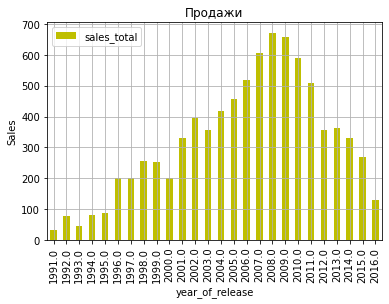

In [19]:
df[df['year_of_release'] > 1990] \
  .groupby('year_of_release')['sales_total'].agg(sum).reset_index()\
  .plot(kind='bar', x='year_of_release',  y='sales_total', grid=1, color='y', ylabel='Sales', title="Продажи")

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет, включая 2016 год)

In [20]:
df = df[df['year_of_release']>2011].copy()
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  sales_total      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


## Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
df['platform'] = df['platform'].str.lower()

In [22]:
top_sales = df.groupby(['platform'])['sales_total'].sum().sort_values(ascending=False).head(10).reset_index()
t = top_sales['platform'].to_list()
t
#top_sales

['ps4', 'ps3', 'x360', '3ds', 'xone', 'wiiu', 'pc', 'psv', 'wii', 'ds']

In [23]:
df_top_sales = df[(df['platform'].isin(t))].reset_index(drop=1)
df_top_sales.head()

name platform  year_of_release         genre  \
0          Grand Theft Auto V      ps3             2013        Action   
1          Grand Theft Auto V     x360             2013        Action   
2   Call of Duty: Black Ops 3      ps4             2015       Shooter   
3         Pokemon X/Pokemon Y      3ds             2013  Role-Playing   
4  Call of Duty: Black Ops II      ps3             2012       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0      7.02      9.09      0.98         3.96          97.0         8.2      M   
1      9.66      5.14      0.06         1.41          97.0         8.1      M   
2      6.03      5.86      0.36         2.38           NaN         NaN    NaN   
3      5.28      4.19      4.35         0.78           NaN         NaN    NaN   
4      4.99      5.73      0.65         2.42          83.0         5.3      M   

   sales_total  
0        21.05  
1        16.27  
2        14.63  
3        14.60  
4        13.79

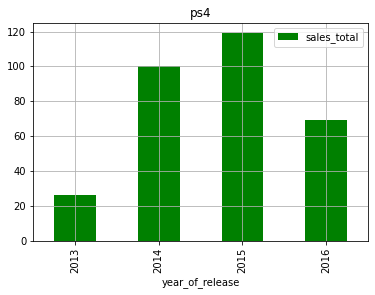

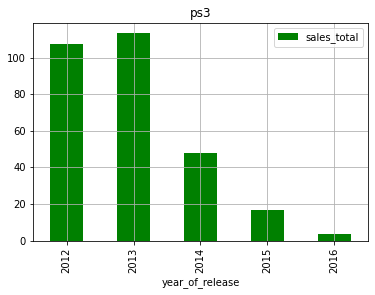

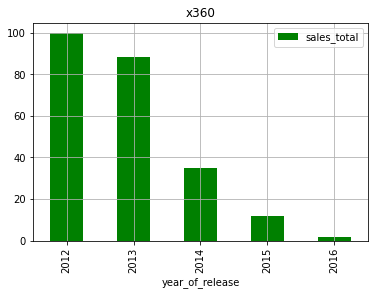

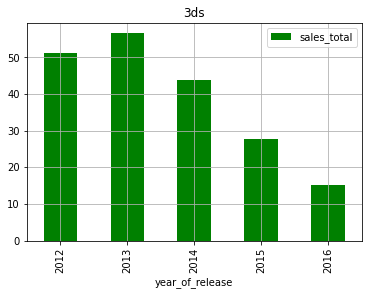

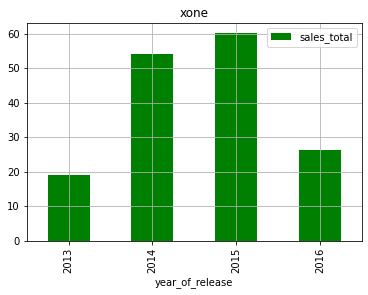

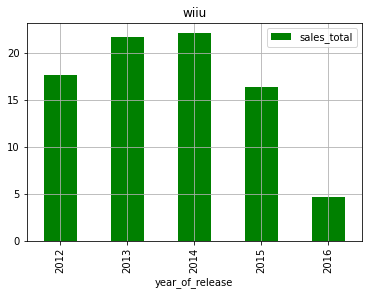

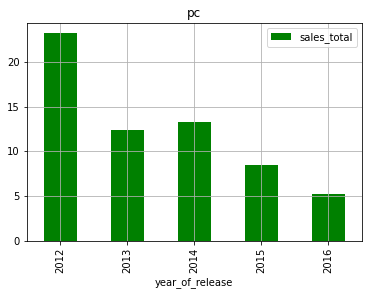

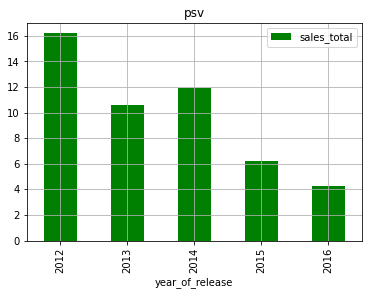

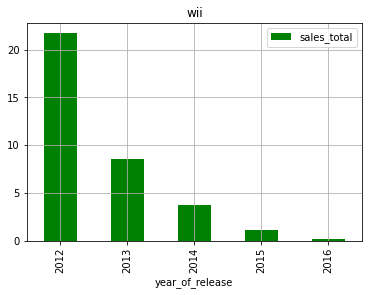

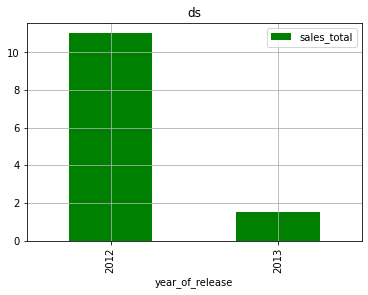

In [24]:
for name in t:
  df_top_sales[df_top_sales['platform'] == name]\
  .groupby('year_of_release')['sales_total'].agg(sum).reset_index()\
  .plot(kind='bar', x='year_of_release',  y='sales_total', grid=1, color='g', title=name)
  

По всем платформам-лидерам продаж наблюдается спад после 2011 года.   
Наиболее переспективными представляются ps4, хone и 3ds по самым положительным показателям.
Можно сказать, что век одной игровой платформы составляет 8-10 лет с пиком в начале или середине этого срока.  

## Возьмем данные за соответствующий актуальный период.

In [25]:
df = df[df['year_of_release']>2011].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  sales_total      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


## Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

<AxesSubplot:xlabel='platform', ylabel='sales_total'>

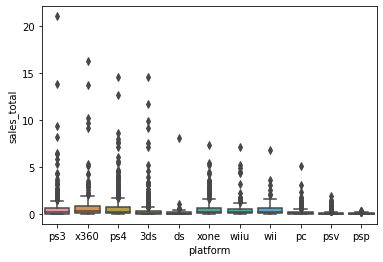

In [26]:
sns.boxplot(data=df, x='platform', y='sales_total')

<AxesSubplot:xlabel='platform', ylabel='sales_total'>

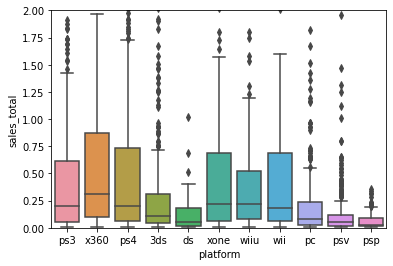

In [27]:
plt.ylim([0, 2])
sns.boxplot(data=df, x='platform', y='sales_total')

In [28]:
df.groupby('platform')['sales_total'].agg(['sum', 'count', 'mean', 'median', 'max']).sort_values('sum', ascending=0)

sum  count      mean  median    max
platform                                        
ps4       314.14    392  0.801378    0.20  14.63
ps3       288.79    493  0.585781    0.20  21.05
x360      236.54    292  0.810068    0.31  16.27
3ds       194.61    396  0.491439    0.11  14.60
xone      159.32    247  0.645020    0.22   7.39
wiiu       82.19    147  0.559116    0.22   7.09
pc         62.65    250  0.250600    0.08   5.14
psv        49.18    411  0.119659    0.05   1.96
wii        35.37     54  0.655000    0.18   6.76
ds         12.55     31  0.404839    0.05   8.06
psp        11.19    173  0.064682    0.03   0.36

## Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Корреляция продаж и оценок для ps4


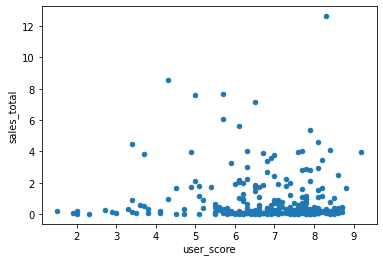

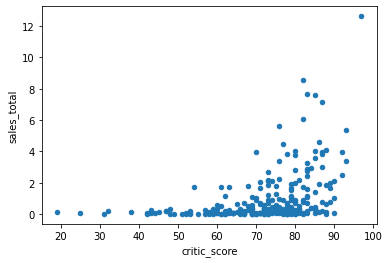

              user_score  critic_score  sales_total
user_score      1.000000      0.557654    -0.031957
critic_score    0.557654      1.000000     0.406568
sales_total    -0.031957      0.406568     1.000000
**************************************************
Корреляция продаж и оценок для ps3


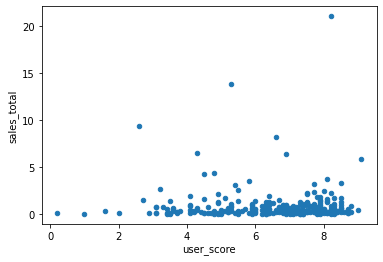

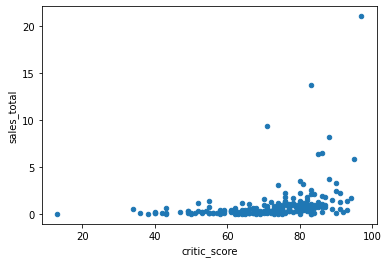

              user_score  critic_score  sales_total
user_score      1.000000      0.539456    -0.005144
critic_score    0.539456      1.000000     0.331497
sales_total    -0.005144      0.331497     1.000000
**************************************************
Корреляция продаж и оценок для x360


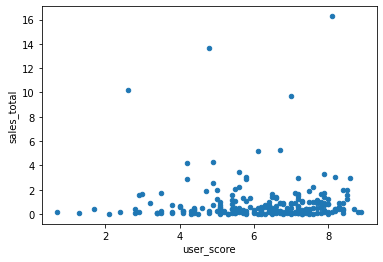

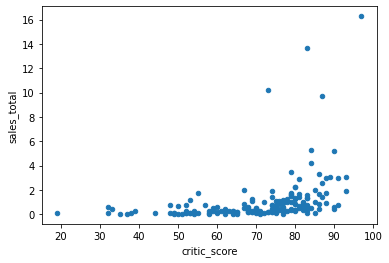

              user_score  critic_score  sales_total
user_score      1.000000      0.557352     0.006164
critic_score    0.557352      1.000000     0.360573
sales_total     0.006164      0.360573     1.000000
**************************************************
Корреляция продаж и оценок для 3ds


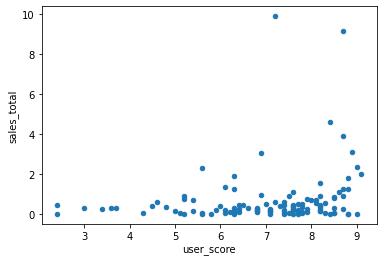

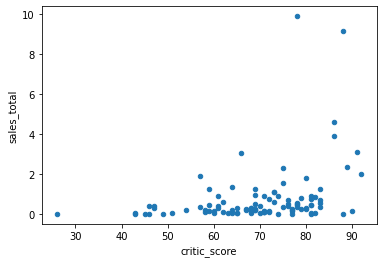

              user_score  critic_score  sales_total
user_score      1.000000      0.722762     0.197583
critic_score    0.722762      1.000000     0.320803
sales_total     0.197583      0.320803     1.000000
**************************************************
Корреляция продаж и оценок для xone


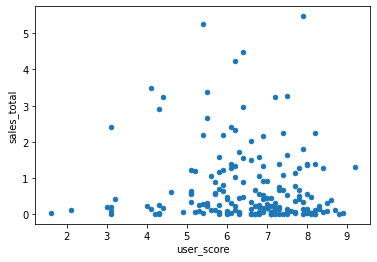

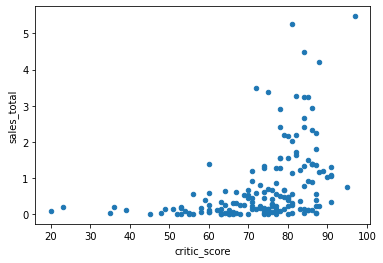

              user_score  critic_score  sales_total
user_score      1.000000      0.472462    -0.068925
critic_score    0.472462      1.000000     0.416998
sales_total    -0.068925      0.416998     1.000000
**************************************************
Корреляция продаж и оценок для wiiu


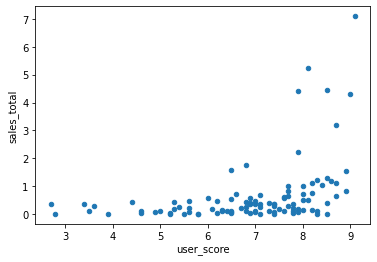

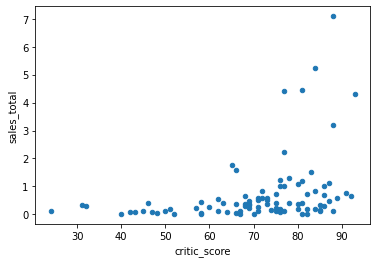

              user_score  critic_score  sales_total
user_score      1.000000       0.77008     0.400219
critic_score    0.770080       1.00000     0.348380
sales_total     0.400219       0.34838     1.000000
**************************************************
Корреляция продаж и оценок для pc


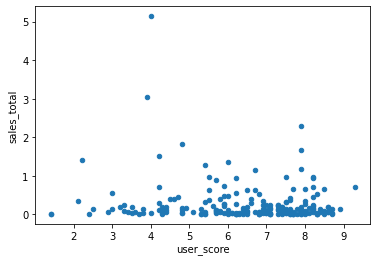

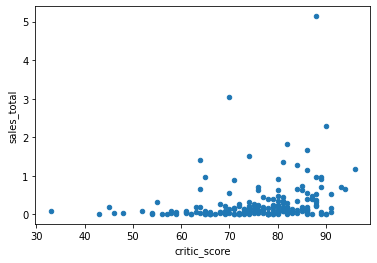

              user_score  critic_score  sales_total
user_score      1.000000      0.432587    -0.121867
critic_score    0.432587      1.000000     0.237243
sales_total    -0.121867      0.237243     1.000000
**************************************************
Корреляция продаж и оценок для psv


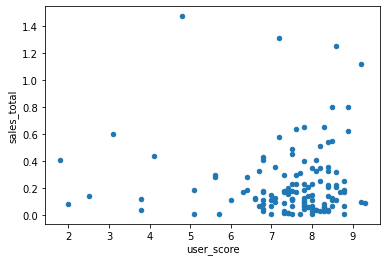

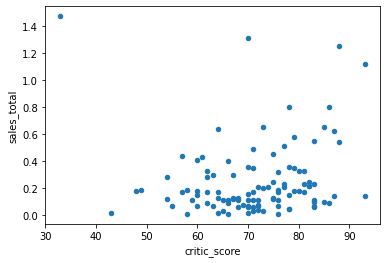

              user_score  critic_score  sales_total
user_score      1.000000      0.699199    -0.004339
critic_score    0.699199      1.000000     0.094488
sales_total    -0.004339      0.094488     1.000000
**************************************************


In [29]:
for name in t:
    try:
        temp = df[df['platform']==name]
        if temp['sales_total'].count()>100:
            print('Корреляция продаж и оценок для', name)
            temp.plot(kind='scatter', x='user_score', y='sales_total')
            temp.plot(kind='scatter', x='critic_score', y='sales_total')
            plt.show()
            print(temp[['user_score', 'critic_score', 'sales_total']].corr())
            print('*'*50)
    except:
            print('-')

Как правило продажи имеют практически нулевую корреляцию со зрительскими оценками. Возможное объяснение состоит в том, что у пользователей нет общей системы оценок и они по-разному могут оценивать похожие впечатления от игры. (Кто-то никогда не ставит выше 5, а кто-то наоборот 8-10). Из-за этого диаграмма рассеяния выглядит так разрозненно.  
В то же время у критиков мнение более систематизировано, у них корреляция варьируется в диапозоне 35-40%.

## Посмотрим на общее распределение игр по жанрам. 

genre  count     sum      mean    max
0      Adventure    302   29.43  0.097450   1.66
1         Puzzle     28    4.89  0.174643   1.19
2       Strategy     71   13.34  0.187887   1.67
3       Fighting    109   44.49  0.408165   7.55
4         Action   1031  441.12  0.427856  21.05
5     Simulation     80   35.12  0.439000   9.17
6           Misc    192   85.04  0.442917   9.18
7         Racing    115   53.50  0.465217   7.09
8   Role-Playing    370  192.80  0.521081  14.60
9         Sports    268  181.07  0.675634   8.58
10      Platform     85   61.00  0.717647   9.90
11       Shooter    235  304.73  1.296723  14.63

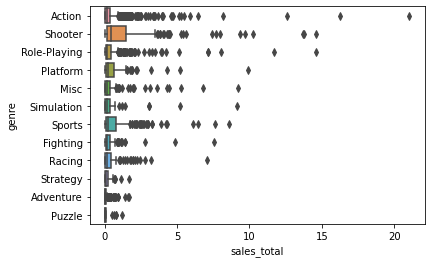

In [30]:
sns.boxplot(data = df, x='sales_total', y='genre', orient='h')
df.groupby(by='genre', as_index=False)['sales_total'].agg(['count', 'sum', 'mean', 'max']).sort_values(by='mean').reset_index()

<AxesSubplot:xlabel='sales_total', ylabel='genre'>

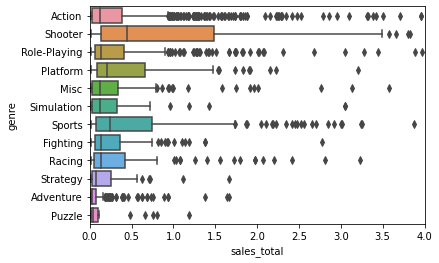

In [31]:
plt.xlim([0, 4])
sns.boxplot(data = df, x='sales_total', y='genre')

Лучше всего продаются шутеры, спортивные игры и платформеры. Хуже всех - головоломки, стратегии и приключения.   

# Шаг 4. Составим портрет пользователя каждого региона  
## Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [32]:
na_platform = df.groupby(by =['platform'], as_index=0)['na_sales']\
                .agg('sum').sort_values(by='na_sales', ascending=0).reset_index(drop=1)
na_platform['share']=((na_platform['na_sales']/na_platform['na_sales'].sum())*100).round(2)
eu_platform = df.groupby(by =['platform'], as_index=0)['eu_sales']\
                .agg('sum').sort_values(by='eu_sales', ascending=0).reset_index(drop=1)
eu_platform['share']=((eu_platform['eu_sales']/eu_platform['eu_sales'].sum())*100).round(2)
jp_platform = df.groupby(by =['platform'], as_index=0)['jp_sales']\
                .agg('sum').sort_values(by='jp_sales', ascending=0).reset_index(drop=1)
jp_platform['share']=((jp_platform['jp_sales']/jp_platform['jp_sales'].sum())*100).round(2)
print(na_platform.head(), '\n', eu_platform.head(), '\n', jp_platform.head())

  platform  na_sales  share
0     x360    140.05  23.70
1      ps4    108.74  18.40
2      ps3    103.38  17.49
3     xone     93.12  15.76
4      3ds     55.31   9.36 
   platform  eu_sales  share
0      ps4    141.09  27.84
1      ps3    106.86  21.08
2     x360     74.52  14.70
3     xone     51.59  10.18
4      3ds     42.64   8.41 
   platform  jp_sales  share
0      3ds     87.79  45.59
1      ps3     35.29  18.32
2      psv     21.04  10.93
3      ps4     15.96   8.29
4     wiiu     13.01   6.76


In [33]:
na_platform.loc[5] = na_platform.loc[5:].sum()
na_platform.loc[5, 'platform'] = 'others'
na_platform = na_platform.drop([6, 7, 8, 9,10])

eu_platform.loc[5] = eu_platform.loc[5:].sum()
eu_platform.loc[5, 'platform'] = 'others'
eu_platform = eu_platform.drop([6, 7, 8, 9,10])

jp_platform.loc[5] = jp_platform.loc[5:].sum()
jp_platform.loc[5, 'platform'] = 'others'
jp_platform = jp_platform.drop([6, 7, 8, 9,10])

In [34]:
na_platform.head(8)

platform  na_sales  share
0     x360    140.05  23.70
1      ps4    108.74  18.40
2      ps3    103.38  17.49
3     xone     93.12  15.76
4      3ds     55.31   9.36
5   others     90.37  15.30

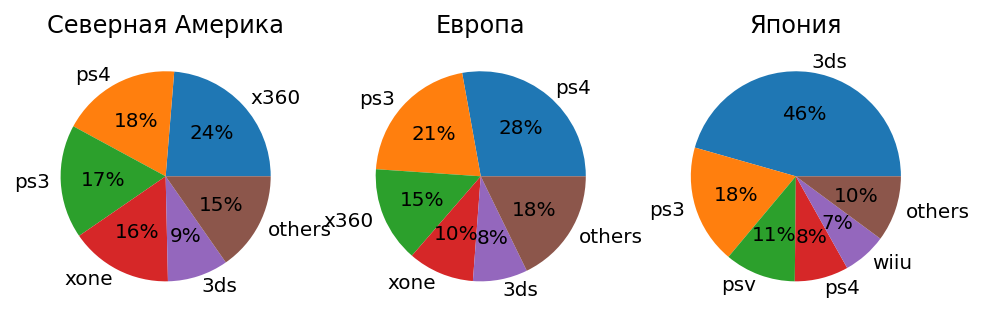

In [35]:
fig = plt.figure(figsize=(8,8),dpi=144)

ax1 = fig.add_subplot(131)
ax1.pie(na_platform.na_sales, labels=na_platform.platform, autopct='%1.0f%%')
ax1.set_title('Северная Америка')

ax2 = fig.add_subplot(132)
ax2.pie(eu_platform.eu_sales, labels=eu_platform.platform, autopct='%1.0f%%')
ax2.set_title('Европа')

ax3 = fig.add_subplot(133)
ax3.pie(jp_platform.jp_sales, labels=jp_platform.platform, autopct='%1.0f%%')
ax3.set_title('Япония')

plt.show()

Американский рынок самый крупный.  
Топ 5 платформ на американском и европейском рынке совпадают (3ds, ps3, xone, ps4, x360).  
В Японии в список лидеров добавились psv и wiiu.  
Лидеры американского рынка - xone и ps4  
Европейского - ps4  
Японского - 3ds  

## Самые популярные жанры (топ-5). 

In [36]:
na_genre = df.groupby(by =['genre'], as_index=0)['na_sales']\
                .agg('sum').sort_values(by='na_sales', ascending=0).reset_index(drop=1)
eu_genre = df.groupby(by =['genre'], as_index=0)['eu_sales']\
                .agg('sum').sort_values(by='eu_sales', ascending=0).reset_index(drop=1)
jp_genre = df.groupby(by =['genre'], as_index=0)['jp_sales']\
                .agg('sum').sort_values(by='jp_sales', ascending=0).reset_index(drop=1)
print(na_genre.head(12), '\n', eu_genre.head(), '\n', jp_genre.head())

           genre  na_sales
0         Action    177.84
1        Shooter    144.77
2         Sports     81.53
3   Role-Playing     64.00
4           Misc     38.19
5       Platform     25.38
6       Fighting     19.79
7         Racing     17.22
8      Adventure      8.92
9     Simulation      7.97
10      Strategy      4.23
11        Puzzle      1.13 
           genre  eu_sales
0        Action    159.34
1       Shooter    113.47
2        Sports     69.09
3  Role-Playing     48.53
4        Racing     27.29 
           genre  jp_sales
0  Role-Playing     65.44
1        Action     52.80
2          Misc     12.86
3    Simulation     10.41
4      Fighting      9.44


In [37]:
na_genre.loc[5] = na_genre.loc[5:].sum()
na_genre.loc[5, 'genre'] = 'others'
na_genre = na_genre.drop([6, 7, 8, 9,10,11])

eu_genre.loc[5] = eu_genre.loc[5:].sum()
eu_genre.loc[5, 'genre'] = 'others'
eu_genre = eu_genre.drop([6, 7, 8, 9,10,11])

jp_genre.loc[5] = jp_genre.loc[5:].sum()
jp_genre.loc[5, 'genre'] = 'others'
jp_genre = jp_genre.drop([6, 7, 8, 9,10,11])

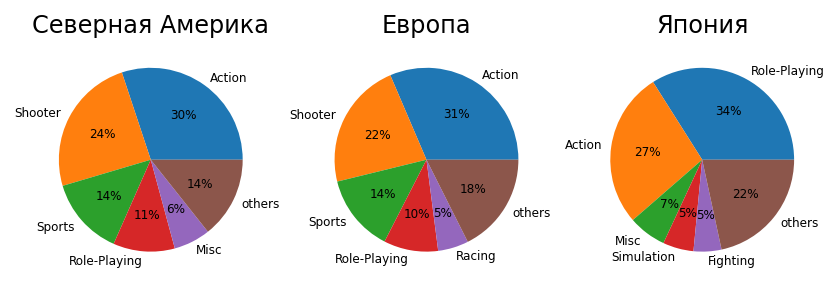

In [38]:
fig = plt.figure(figsize=(7,7),dpi=144)

ax1 = fig.add_subplot(131)
ax1.pie(na_genre.na_sales, labels=na_genre.genre, autopct='%1.0f%%', textprops={'fontsize': 6})
ax1.set_title('Северная Америка')

ax2 = fig.add_subplot(132)
ax2.pie(eu_genre.eu_sales, labels=eu_genre.genre, autopct='%1.0f%%', textprops={'fontsize': 6})
ax2.set_title('Европа')

ax3 = fig.add_subplot(133)
ax3.pie(jp_genre.jp_sales, labels=jp_genre.genre, autopct='%1.0f%%', textprops={'fontsize': 6})
ax3.set_title('Япония')

plt.show()

Топ-3 для Американского и Европейского рынка - экшены, шутеры и спортивные игры   
А лидеры в Японии - экшены и ролевые игры

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
df['rating'] = df['rating'].fillna(-1)

In [40]:
na_rating_1 = df.groupby('rating', as_index=0)['na_sales'].agg('mean').sort_values(by='na_sales', ascending=0)
eu_rating_1 = df.groupby('rating', as_index=0)['eu_sales'].agg('mean').sort_values(by='eu_sales', ascending=0)
jp_rating_1 = df.groupby('rating', as_index=0)['jp_sales'].agg('mean').sort_values(by='jp_sales', ascending=0)
print(na_rating_1.head(), '\n', eu_rating_1.head(), '\n', jp_rating_1.head())

  rating  na_sales
3      M  0.465000
1      E  0.289544
2   E10+  0.247386
4      T  0.160243
0     -1  0.081027 
   rating  eu_sales
3      M  0.389478
1      E  0.286152
2   E10+  0.180948
4      T  0.128544
0     -1  0.071765 
   rating  jp_sales
0     -1  0.085365
1      E  0.071722
4      T  0.063155
3      M  0.042570
2   E10+  0.026765


Рейтинг ERSB предназначен для маркировки игр для США и Канады.  
Однако он так же влияет и на европейский рынок.  
А вот в Японии на него похоже совсем не обращают внимания.

# Шаг 5. Проверим гипотезы  
## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Н0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Н1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются 
  
*За Н0 берем событие, которое нужно проверить в формулировке, содержащей равенство,  
Альтернативной гипотезой становится обратное утверждение*

In [41]:
alpha = 0.01 
xbox = df[(df['platform']=='xone')&(df['user_score']>0)]['user_score']
pc = df[(df['platform']=='pc')&(df['user_score']>0)]['user_score']
results = st.ttest_ind(xbox, pc, equal_var=False) 


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Резуальтат исследования означает, что равенство пользовательских рейтингов Xbox One и PC не исключено, однако и не доказано.**

In [42]:
t = df.groupby('platform')['user_score'].describe()
t[2::8]

count      mean       std  min  25%  50%  75%  max
platform                                                    
pc        206.0  6.428641  1.664465  1.4  5.5  6.8  7.7  9.3
xone      182.0  6.521429  1.380941  1.6  5.8  6.8  7.5  9.2

Видим, что значения действительно находятся довольно близко друг к другу.

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые  
Н1 - Средние пользовательские рейтинги жанров Action и Sports отличаются 
  
*За Н0 берем событие, которое нужно проверить в формулировке, содержащей равенство,  
Альтернативной гипотезой становится обратное утверждение*

In [43]:
alpha = 0.01 
action = df[(df['genre']=='Action')&(df['user_score']>0)]['user_score']
sports = df[(df['genre']=='Sports')&(df['user_score']>0)]['user_score']
results = st.ttest_ind(action, sports, equal_var=False) 


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Сравниваем две возможно пересекающиеся, но независимые совокупности - оценки пользователей игр разных жанров. Поэтому пользуемся соответствующим t-тестом.  
p-value оказалось очень маленьким, это значит, что на имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

In [44]:
t=df.groupby('genre')['user_score'].describe()
t[0::10]

count      mean       std  min   25%  50%  75%  max
genre                                                      
Action  523.0  6.825048  1.374440  1.6  6.25  7.1  7.8  9.1
Sports  195.0  5.455897  1.738646  0.2  4.30  5.7  6.8  8.8

Здесь видим более весомый разброс между данными, отсюда такой результат t-теста.



---


# Общий вывод


---



*   Наиболее перспективными представляются  *ps4, xone* по самым положительным показателям.
* Большая часть почти продаж всех платформ ограничивается 0,8. Нормальные значения доходят до 1.25-1.75. Выше уже находятся выбросы.
* Как правило продажи имеют практически нулевую корреляцию со зрительскими оценками. В то же время у критиков мнение более систематизировано, у них корреляция варьируется в диапозоне 35-40%.
* Лучше всего по миру продаются *шутеры, спортивные игры* и платформеры. Хуже всех - головоломки, стратегии и приключения.
* *Американский рынок самый крупный*.  
* Лидеры американского рынка - xone и ps4, Европейского - ps4, Японского - 3ds  
* Топ-3 жанра для Американского и Европейского рынка - *шутеры и спортивные игры*, а также менее стабильные экшен-игры. А лидеры в Японии - экшены и ролевые игры
* Рейтинг ERSB предназначен для маркировки игр для США и Канады. А вот в Японии на него похоже совсем не обращают внимания.
* Резуальтат исследования означает, что равенство пользовательских рейтингов Xbox One и PC не исключено, однако и не доказано.
* Средние пользовательские рейтинги жанров Action и Sports действительно отличаются.

